##1. Set Up the Environment
First, install the necessary libraries if you haven't already:

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

Import the libraries in your Python script or Jupyter Notebook:

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

##2. Load the Dataset

In [ ]:
# Load dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Check the shape of the dataset
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset contains 7043 rows and 21 columns.


In [ ]:
# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##3. Understanding the Data



In [ ]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Note: The TotalCharges column should be numeric, but it's showing as object. We'll handle this in the preprocessing step.**

In [ ]:
# Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Display column names
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
# Check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


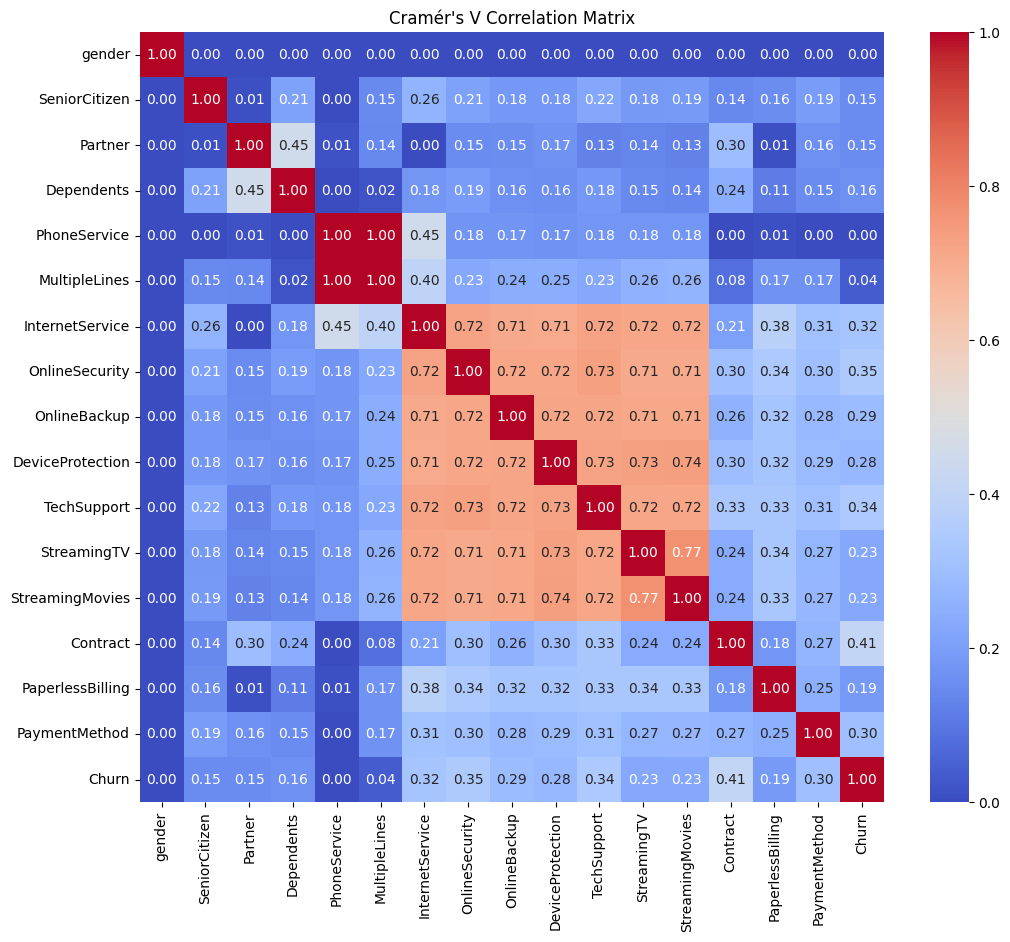

In [ ]:
# Define the list of categorical features (replace with actual categorical column names)
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Add 'Churn' to the list of categorical features
features = categorical_features + ['Churn']

# Calculate Cramér's V for each pair of categorical features
n = len(features)
cramers_results = pd.DataFrame(np.zeros((n, n)), columns=features, index=features)

for f1 in features:
    for f2 in features:
        cramers_results.loc[f1, f2] = cramers_v(df[f1], df[f2])

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cramers_results, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Cramér\'s V Correlation Matrix')
plt.show()


##4. Data Preprocessing

4.1 Handling Missing Values and Data Types

In [ ]:
# Replace spaces with NaN and convert to numeric
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
# Check for missing values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Drop rows with missing 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

4.2 Encoding Categorical Variables

In [ ]:
# Drop 'customerID' as it is not useful for prediction
df.drop(['customerID'], axis=1, inplace=True)

In [ ]:
# Convert 'Churn' column to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# List of categorical variables
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", cat_cols)

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
# Label Encoding for binary variables
le = LabelEncoder()
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

print("Label Encoded Columns:", binary_cols)

Label Encoded Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [ ]:
#One-Hot Encoding for Remaining Categorical Variables
# One-Hot Encoding
df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in binary_cols])

In [ ]:
#Feature Scaling
# Scale numerical features
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

##5. Exploratory Data Analysis (EDA)

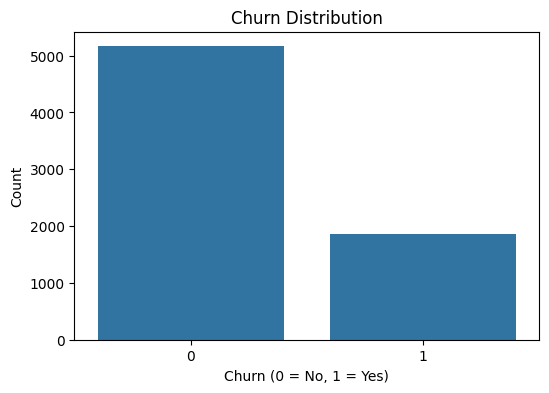

In [ ]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

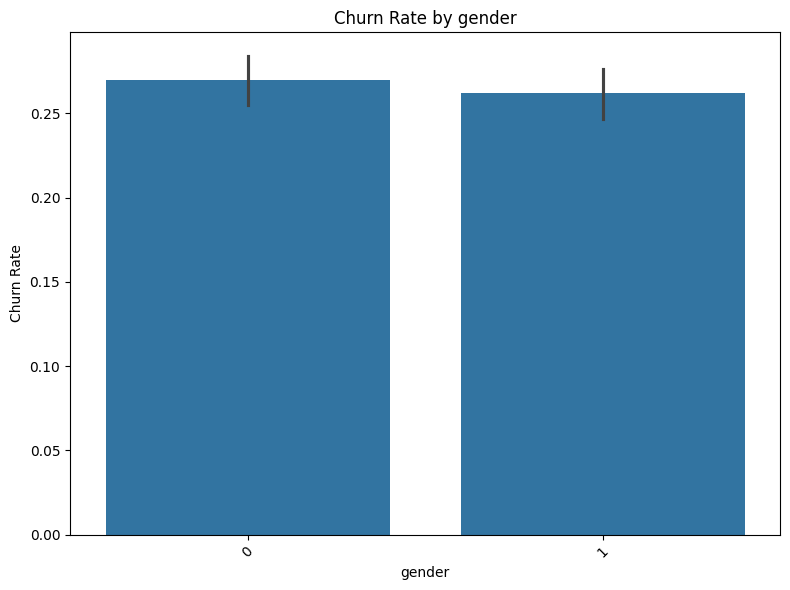

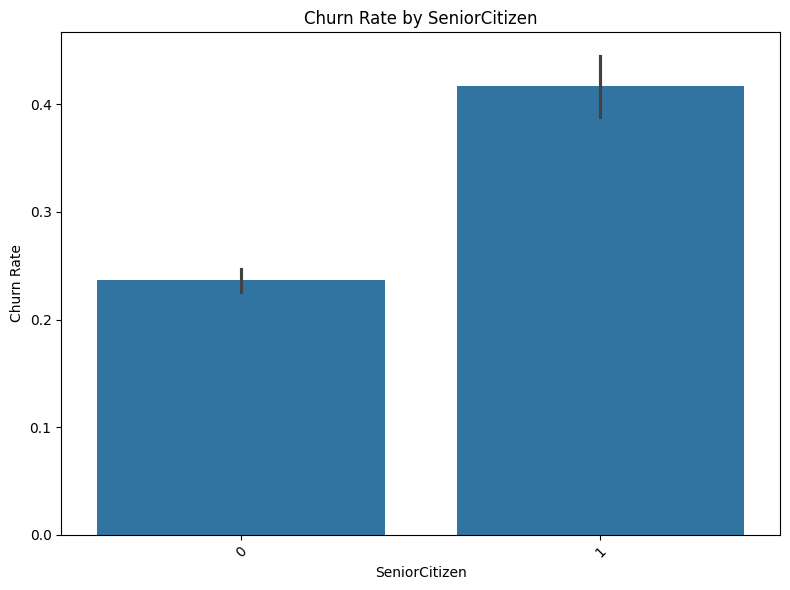

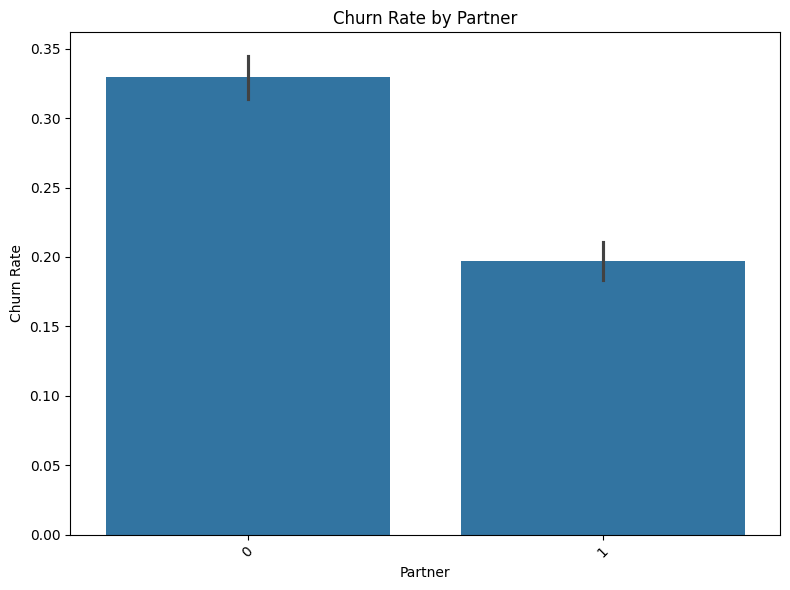

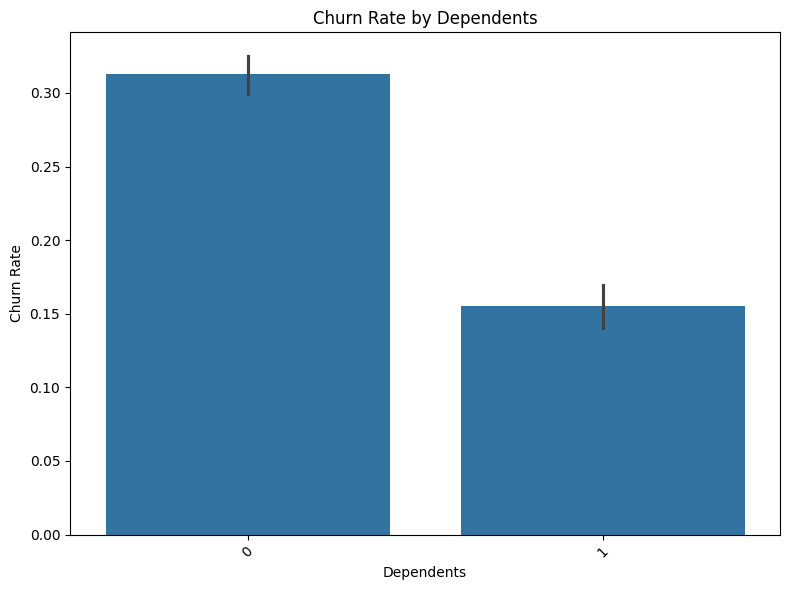

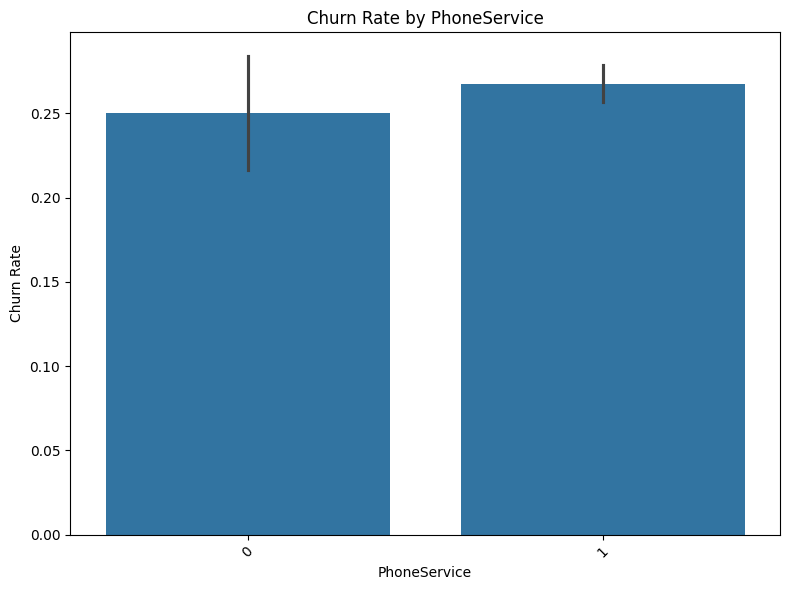

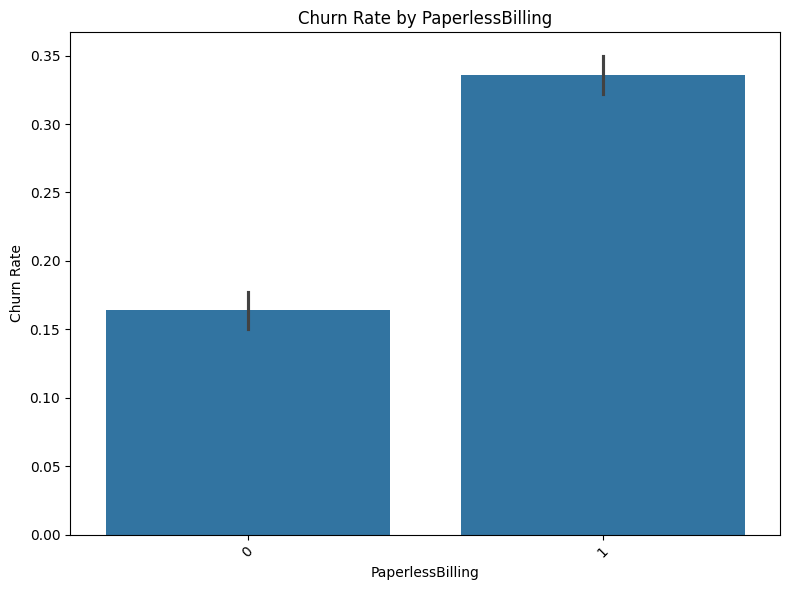

In [ ]:
# List of categorical features after encoding
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines_No phone service',
                        'MultipleLines_Yes', 'InternetService_DSL',
                        'InternetService_Fiber optic', 'InternetService_No',
                        'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                        'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                        'DeviceProtection_No internet service', 'DeviceProtection_Yes',
                        'TechSupport_No internet service', 'TechSupport_Yes',
                        'StreamingTV_No internet service', 'StreamingTV_Yes',
                        'StreamingMovies_No internet service', 'StreamingMovies_Yes',
                        'Contract_One year', 'Contract_Two year',
                        'PaperlessBilling', 'PaymentMethod_Bank transfer (automatic)',
                        'PaymentMethod_Credit card (automatic)',
                        'PaymentMethod_Electronic check']

# Due to the large number of features, we will plot only the original categorical features
original_categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Plotting churn rate for each categorical feature
def plot_churn_rate(feature):
    churn_rate = df[[feature, 'Churn']].copy()
    if df[feature].dtype != 'int64' and df[feature].dtype != 'float64':
        churn_rate[feature] = churn_rate[feature].astype('category')
    plt.figure(figsize=(8,6))
    sns.barplot(x=feature, y='Churn', data=churn_rate, estimator=np.mean)
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Convert encoded columns back to original for plotting
df_plot = df.copy()
# Reverse label encoding for plotting
df_plot['gender'] = df_plot['gender'].map({1: 'Male', 0: 'Female'})
df_plot['Partner'] = df_plot['Partner'].map({1: 'Yes', 0: 'No'})
df_plot['Dependents'] = df_plot['Dependents'].map({1: 'Yes', 0: 'No'})
df_plot['PhoneService'] = df_plot['PhoneService'].map({1: 'Yes', 0: 'No'})
df_plot['PaperlessBilling'] = df_plot['PaperlessBilling'].map({1: 'Yes', 0: 'No'})

# Plot churn rates
for feature in original_categorical_features:
    if feature in df_plot.columns:
        plot_churn_rate(feature)

**Note: For plotting, we reverse the encoding of the binary variables to make the plots more interpretable.**

##7. Model Building

In [ ]:
# Define X and y
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# Class distribution
print(y.value_counts(normalize=True))

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(y_resampled.value_counts(normalize=True))

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

### Build Models

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##8. Model Evaluation

8.1 Evaluate Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1037
           1       0.81      0.84      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



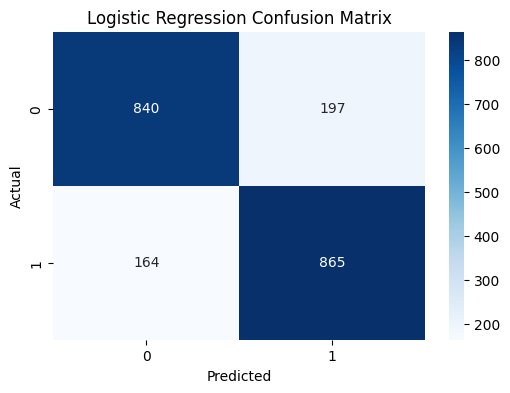

In [ ]:
# Predictions
y_pred_lr = lr.predict(X_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


8.2 Evaluate Decision Tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1037
           1       0.79      0.79      0.79      1029

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



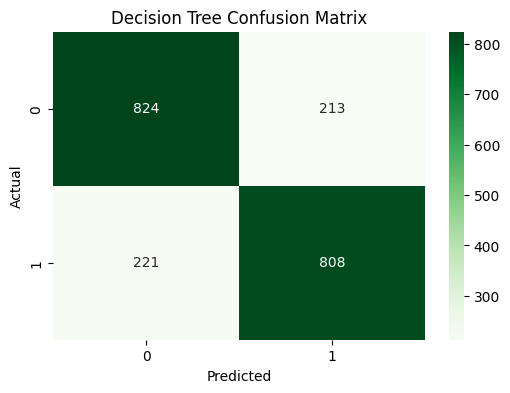

In [ ]:
# Predictions
y_pred_dt = dt.predict(X_test)

# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

8.3 Evaluate Random Forest

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1037
           1       0.83      0.87      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



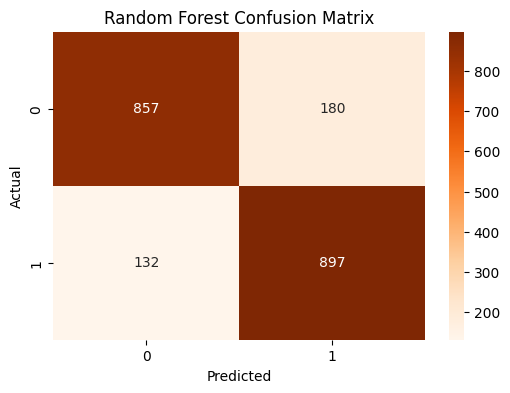

In [ ]:
# Predictions
y_pred_rf = rf.predict(X_test)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

8.4 ROC Curve and AUC Score

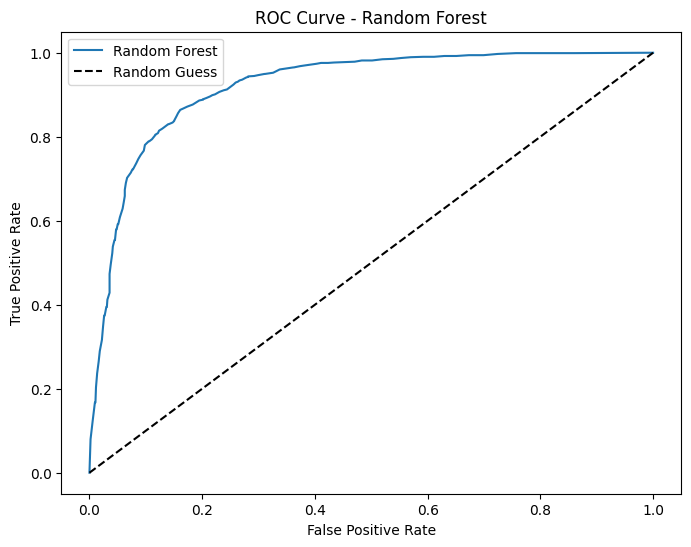

Random Forest AUC Score: 0.9200


In [ ]:
# Compute predicted probabilities for Random Forest
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print(f'Random Forest AUC Score: {auc_score:.4f}')

##9. Hyperparameter Tuning

9.1 Tuning Random Forest Classifier

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


9.2 Evaluate Tuned Model

Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1037
           1       0.83      0.88      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



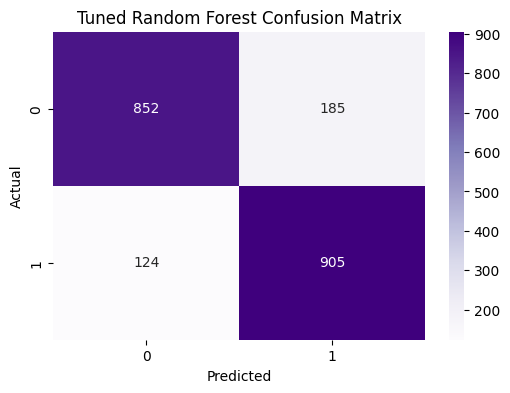

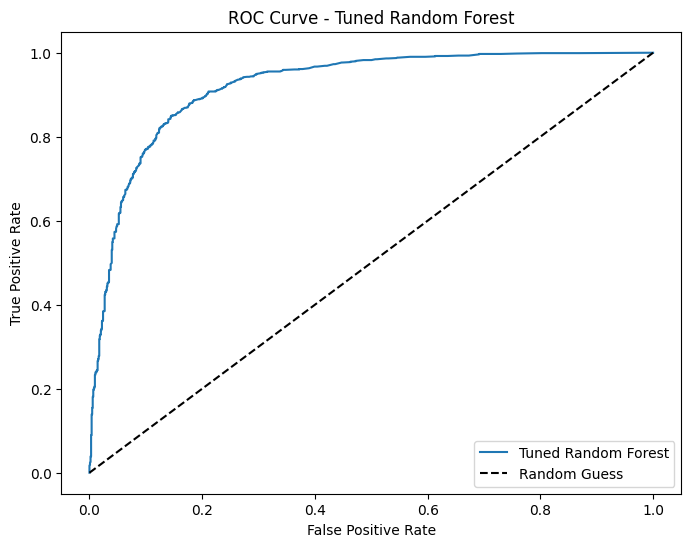

Tuned Random Forest AUC Score: 0.9210


In [ ]:
# Best estimator
best_rf = grid_search.best_estimator_

# Predictions
y_pred_best_rf = best_rf.predict(X_test)

# Classification Report
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Purples')
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_pred_prob_best_rf = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_best_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Tuned Random Forest')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend()
plt.show()

auc_score_best = roc_auc_score(y_test, y_pred_prob_best_rf)
print(f'Tuned Random Forest AUC Score: {auc_score_best:.4f}')

##10. Final Model Evaluation

Feature ranking:
1. Feature tenure (0.13053148379934792)
2. Feature TotalCharges (0.12873971694454528)
3. Feature MonthlyCharges (0.11907758805254058)
4. Feature Contract_Month-to-month (0.1064683158736563)
5. Feature TechSupport_No (0.04825318278372044)
6. Feature OnlineSecurity_No (0.040277138706622966)
7. Feature PaymentMethod_Electronic check (0.037734237910022506)
8. Feature InternetService_Fiber optic (0.03205241956929332)
9. Feature Contract_Two year (0.027076832332422772)
10. Feature gender (0.022186566076929582)
11. Feature Dependents (0.01982967027688739)
12. Feature Partner (0.019629783892933482)
13. Feature PaperlessBilling (0.019614208615019647)
14. Feature OnlineBackup_No (0.01818749114018168)
15. Feature Contract_One year (0.01567794449416327)
16. Feature DeviceProtection_No (0.015604212410236282)
17. Feature SeniorCitizen (0.01462152879027388)
18. Feature PaymentMethod_Credit card (automatic) (0.013231984386282345)
19. Feature StreamingMovies_Yes (0.012730880476607438)


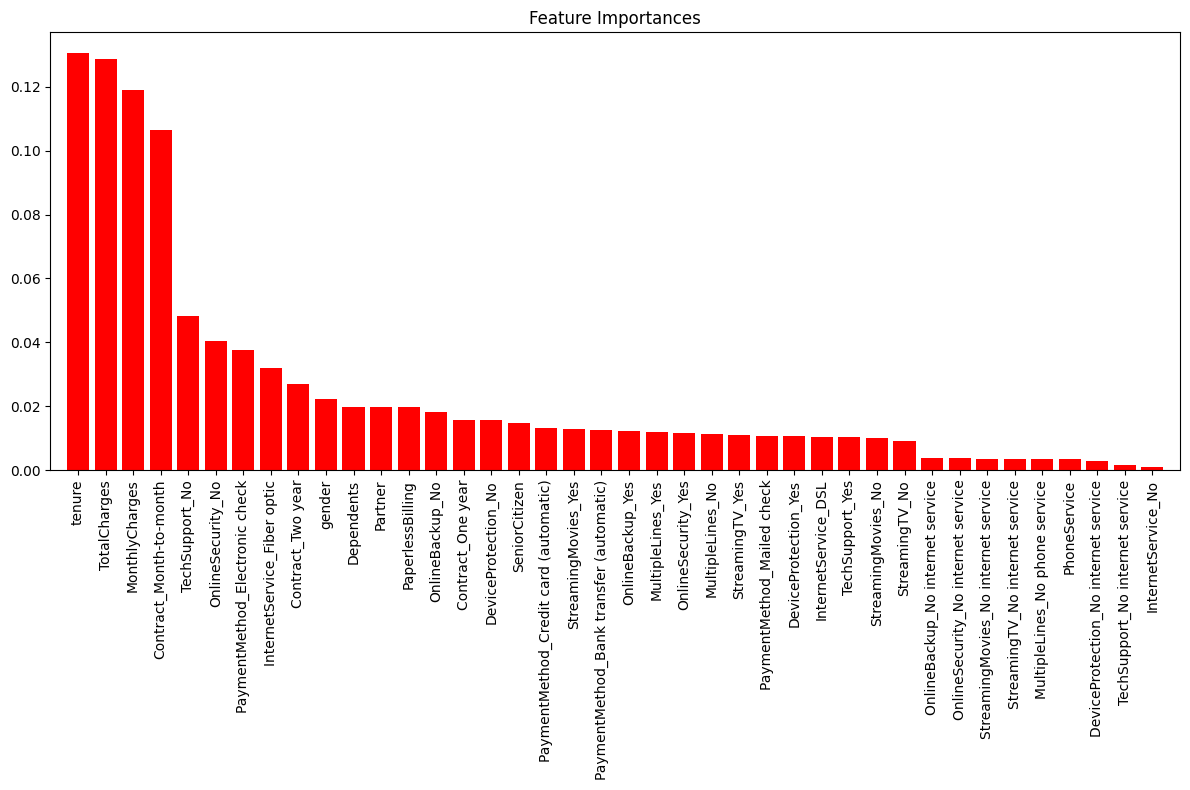

In [ ]:
# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

##11. Conclusion

Based on the evaluation metrics, the Tuned Random Forest Classifier performed the best among the models tested, achieving higher accuracy, precision, recall, and AUC score.

Key Findings:

* Important Features: Tenure, MonthlyCharges, and TotalCharges are among the most important features in predicting churn.
* Customers with shorter tenure and higher monthly charges are more likely to churn.
* Contract type and payment methods also play significant roles in churn prediction.



####Recommendations:

* Implement Customer Retention Strategies:

  * Offer incentives or discounts to customers with short tenure to encourage them to stay.
  * Review pricing strategies for services with high monthly charges.
* Enhance Service Quality:
  * Investigate and address issues leading to customer dissatisfaction, especially for services associated with higher churn rates.
* Customer Engagement:
  * Engage customers through personalized communication and offers based on their usage patterns and preferences.